<span style="font-size: 35px;">Vehicle Insurance Claims Prediction</span>

The "Vehicle Insurance Claims Prediction" project was part of the "Allstate Claim Prediction Challenge" on Kaggle, held on 13-07-2011, with a focus on predicting claims payments. The goal was to develop predictive models to estimate insurance claims payments based on historical data and relevant features, using various machine learning techniques, data preprocessing methods, and feature engineering approaches to improve prediction accuracy.

<span style="font-size: 20px;">Import necessary libraries:</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

<span style="font-size: 20px;">Import data:</span>

Load the train and test data from CSV files into variables.

In [2]:
# Import train and test datasets
x_train = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\train_set.csv')

x_test = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\test_set.csv')
example_entry = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\example_entry.csv')
x_test = x_test.merge(example_entry, on='Row_ID', how='left')

In [3]:
#x_train = x_train.sample(frac=0.01)
#x_test = x_test.sample(frac=0.01)

In [3]:
# Due to the large size of the dataset, training the model with the full dataset is difficult, so we sample 60% of the data for training.
#x_train = x_train.sample(frac=0.60)
#x_test = x_test.sample(frac=0.60)

#x_train.to_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\x_train_60.csv', index=False)
#x_test.to_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\x_test_60.csv', index=False)

#x_train = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\x_train_60.csv')
#x_train = x_train.sample(frac=1)
#x_test = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\x_test_60.csv')

<span style="font-size: 25px;">Exploratory Data Analysis:</span>

Let us review the size of the train and test datasets.

In [3]:
# Print the number of training samples, test samples, and the percentage split between training and test data.
print('Number of training samples: ', format(len(x_train),','))
print('Number of test samples: ', format(len(x_test), ','))
print('Train % : ', round(len(x_train) / (len(x_train) + len(x_test)), 3)*100,'%')
print('Test %  : ', round(len(x_test) / (len(x_train) + len(x_test)), 3)*100, '%')

Number of training samples:  13,184,290
Number of test samples:  4,314,865
Train % :  75.3 %
Test %  :  24.7 %



We have nearly 17.5 million data points, including both training and testing samples. This quantity is ideal for conducting extensive hyperparameter tuning and optimization.

Let us review the features in the dataset.

In [4]:
# Print the column names of the training data
print('Features in training data: \n', x_train.columns)
print('Number of features: ', len(x_train.columns)-1)

Features in training data: 
 Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')


There are 34 features in the dataset. Based on the feature names we can categorize the features in some ways.

Let us review the first few rows of data for specific standalone features.

In [5]:
# Print the first few rows of data for specific standalone features
x_train[['Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year','Blind_Make', 'Blind_Model', 'Blind_Submodel']].head()

,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel
0,1,3,2005,2005,K,K.78,K.78.2
1,2,2,2005,2003,Q,Q.22,Q.22.3
2,3,1,2005,1998,AR,AR.41,AR.41.1
3,3,1,2006,1998,AR,AR.41,AR.41.1
4,3,2,2005,2001,D,D.20,D.20.0


The features Household_ID, Vehicle, Calendar_Year and Model_Year are numerical features and the Blind_Make, Blind_Model and Blind_Submodel are categorical features with some sort of relationship in between.

Let us review the features where the feature name has the word "Cat" in it.

In [6]:
# Print the first few rows of data for categorical ("Cat") features that are similar in nature
x_train[['Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'OrdCat']].head()

,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,Cat11,Cat12,OrdCat
0,D,C,F,?,?,C,?,C,A,B,F,D,4
1,B,C,A,A,A,E,C,A,B,A,B,D,5
2,B,?,A,A,A,C,C,A,B,A,E,D,2
3,B,?,A,A,A,C,C,A,B,B,B,B,2
4,J,C,B,?,?,D,?,A,B,A,B,B,5


The "Cat" features are categorical in nature except the feature OrdCat. Also, some features are having "?" in it. It is possibly a missing value and require imputation.

Let us review the next set of features that has the word "Var" in it.

In [ ]:
# Print the first few rows of data for "Var" and "NVVar" features
x_train[['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4']].head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4
0,1.270533,0.999418,0.588154,0.908351,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419
1,0.217950,0.567140,1.421206,0.485509,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419
2,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
3,-0.754282,-1.646127,-1.101091,-1.679445,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419
4,0.563454,1.863975,1.814591,1.838605,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419


Upon reviewing we can see that the "Var" features are having both +ve and -ve numbers except for the feature "NVCat". We can do numerical featurization on these features.

Let us check which features have "?" in them.

In [ ]:
# Selecting non-numeric columns
non_num_cols = x_train.select_dtypes(exclude=[np.number]).columns # include=[object]

# Iterate through each non-numeric column
for col in non_num_cols:
    # Filtering non-null and non-alphanumeric values
    filtered_indices = x_train[col].notnull() & x_train[col].str.contains('[^a-zA-Z0-9]', regex=True, na=False)
    # Extracting unique non-alphanumeric values
    unique_values = x_train.loc[filtered_indices, col].sort_values().unique()
    # Printing the column name and its unique non-alphanumeric values
    if filtered_indices.any():
        print(col, " : ", unique_values)

Blind_Make  :  ['?']
Blind_Model  :  ['?' 'A.2' 'A.3' ... 'Z.45' 'Z.5' 'Z.8']
Blind_Submodel  :  ['?' 'A.2.0' 'A.3.0' ... 'Z.45.0' 'Z.5.0' 'Z.8.0']
Cat1  :  ['?']
Cat2  :  ['?']
Cat3  :  ['?']
Cat4  :  ['?']
Cat5  :  ['?']
Cat6  :  ['?']
Cat7  :  ['?']
Cat8  :  ['?']
Cat10  :  ['?']
Cat11  :  ['?']
OrdCat  :  ['?']


The output above shows that the "Cat" features and the make and model features have "?" in them. We should employ some imputation mechanisms to replace these "?" values.

In [5]:
# Selecting columns with "?" values
cat_feats = x_train.columns[x_train.apply(lambda x: x == "?").any()]
# Initialize a list to store the data
q_data = []

# Iterate through each column with "?" values
for i in cat_feats:
    # Append data to the list
    q_data.append([   
                      i, # Feature name
                      len(x_train[x_train[i]=="?"][i]), # Number of "?" values
                      round((len(x_train[x_train[i]=="?"][i]) / len(x_train))*100, 4),  # Percentage of "?" values
                      round(len(x_train[x_train[i]==x_train[i].mode()[0]][i]) / len(x_train), 4) # Percentage of mode() value other than "?"
                 ])

# Convert the list to a DataFrame with appropriate column names
q_data = pd.DataFrame(q_data, columns=['Feature name', 'No of "?"', 'Percentage of "?"', 'Percentage of "mode()" value other than "?"'])
# Sort the DataFrame by the number of "?" values in descending order
q_data.sort_values(by='No of "?"', ascending=False)

,Feature name,"No of ""?""","Percentage of ""?""","Percentage of ""mode()"" value other than ""?"""
9,Cat7,7167634,54.3650,0.5436
7,Cat5,5637321,42.7579,0.5070
6,Cat4,5631649,42.7148,0.4341
4,Cat2,4874164,36.9695,0.4471
12,Cat11,31469,0.2387,0.5272
3,Cat1,25981,0.1971,0.3047
8,Cat6,25981,0.1971,0.3235
0,Blind_Make,8431,0.0639,0.1257
1,Blind_Model,8431,0.0639,0.0453
2,Blind_Submodel,8431,0.0639,0.0125


The data above indicates that the features "Cat7", "Cat5", "Cat4", and "Cat2" have more than 35% "?" values. For these features, we can impute them with the "mode" value.

For the remaining features, the code below checks if we can impute "?" with any other letters that do not already exist in the dataset for categorical ("Cat") features.

In [ ]:
# Identify categorical features
features = [col for col in x_train.columns if col.startswith("Cat")]
# Get unique values for each categorical feature
unique_values = [x_train[col].unique().tolist() for col in features]

# Flatten and sort unique values
unique_vals = []
for values in unique_values:
    unique_vals.extend(values)
unique_vals = sorted(set([i for i in unique_vals if pd.notna(i)]))

# Print unique non-null values in categorical features
print(unique_vals)

['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


The above result shows that the "Cat" features have only a few unique values and can be imputed with any letters from "K" to "Z" to replace missing values denoted by "?".

Based on the analysis of the "Cat" features above, we observed that "OrdCat" contains numeric values despite not being a numeric feature. Let's examine the unique values in this feature to understand the nature of the values it holds.

In [79]:
# Get the unique values in the 'OrdCat' column of x_train
x_train['OrdCat'].unique()

array(['4', '5', '2', '6', '3', '?', '1', '7', 4, 2, 5, 3, 1, 6, 7],
      dtype=object)

The "OrdCat" feature contains numbers represented as strings. We need to convert these strings into numerical values.

Review the 'Blind_Model' feature to determine its unique values and the number of '?' occurrences within it.

In [3]:
# Print unique values and count for the 'Blind_Model' column
print('Unique values in "Blind_Model" : ', x_train['Blind_Model'].sort_values().unique())
print('Number of unique values in "Blind_Model" : ', x_train['Blind_Model'].nunique())

# Count the number of "?" in the 'Blind_Model' column
print('Number of "?" in "Blind_Model : ', len(x_train.loc[x_train['Blind_Model']=="?", 'Blind_Model']))

Unique values in "Blind_Model" :  ['?' 'A.2' 'A.3' ... 'Z.45' 'Z.5' 'Z.8']
Number of unique values in "Blind_Model" :  1303
Number of "?" in "Blind_Model :  8431


There are 1303 unique values in the 'Blind_Model' feature. The values in the feature are in the format of an alphabet and a number separated by a period.

Let's check the format of the values in the 'Blind_Model' feature to see if it matches the format mentioned above for all values except '?'.

In [5]:
BM_Flag = False
# Loop through the rows of x_train
for i in range(len(x_train)):
    # Split the 'Blind_Model' value at '.' to check for a specific pattern
    num = x_train['Blind_Model'].loc[i].split('.')
    # Check if the first part is not "?"
    if (num[0] != "?") and isinstance(num[0], str):
        # Check if the second part is not a digit
        if not num[1].strip("'").isdigit():
            # Print the index and the second part of 'Blind_Model' if it is not a number
            print(i, num[1])
            BM_Flag = True
if not BM_Flag:
    print('The data is homogeneous in nature, with a period separating text and numbers.')

The data is homogeneous in nature, with a period separating text and numbers.


The above output indicates that the feature contains values in a format consisting of both text and numbers separated by periods. The text and numbers can be separated for feature engineering.

Let us review the feature "Blind_Submodel" to see the format of the data in it.

In [5]:
# Print unique values and count for the 'Blind_Submodel' column
print('Unique values in "Blind_Submodel" : ', x_train['Blind_Submodel'].sort_values().unique())
print('Number of unique values in "Blind_Submodel" : ', x_train['Blind_Submodel'].nunique())

# Count the number of "?" in the 'Blind_Submodel' column
print('Number of "?" in "Blind_Submodel" : ', len(x_train.loc[x_train['Blind_Submodel']=="?", 'Blind_Submodel']))

Unique values in "Blind_Submodel" :  ['?' 'A.2.0' 'A.3.0' ... 'Z.45.0' 'Z.5.0' 'Z.8.0']
Number of unique values in "Blind_Submodel" :  2740
Number of "?" in "Blind_Submodel" :  8431


In [12]:
BS_Flag = False
# Loop through the rows of x_train
for i in range(len(x_train)):
    # Split the 'Blind_Submodel' value at '.' to check for a specific pattern
    num = x_train['Blind_Submodel'].loc[i].split('.')
    # Check if the first part is not "?"
    if (num[0] != "?") and isinstance(num[0], str):
        # Check if the second part is not a digit
        if not num[1].strip("'").isdigit():
            # Print the index and the second part of 'Blind_Submodel' if it doesn't follow the expected pattern
            print(i, num[1])
            BS_Flag = True
        # Check if the third part is not a digit
        if not num[2].strip("'").isdigit():
            # Print the index and the third part of 'Blind_Submodel' if it doesn't follow the expected pattern
            print(i, num[2])
            BS_Flag = True
if not BS_Flag:
    print('The data is homogeneous in nature, with periods separating text and numbers.')

The data is homogeneous in nature, with periods separating text and numbers.


The examination conducted on 'Blind_Submodel,' similar to the previously examined 'Blind_Model,' indicates that the feature contains values in a format consisting of both text and numbers separated by periods. This similarity in structure allows for potential separation during feature engineering.

Check the features that are numbers without zero and can be applied mathematical transformations.

In [ ]:
# Loop through columns with numeric data types in x_train
for i in x_train.select_dtypes(include=[np.number]).columns:
    # Check if the column has no values equal to 0 or 0.0
    if not ((x_train[i] == 0) | (x_train[i] == 0.)).any():
        # Print the column name and the number of unique values
        print(i, ":", x_train[i].nunique())

Row_ID : 13184290
Household_ID : 4309042
Vehicle : 28
Calendar_Year : 3
Model_Year : 29
NVVar1 : 29
NVVar2 : 27
NVVar3 : 31
NVVar4 : 30


The above features consist of numerical values without zeros. Therefore, we can apply mathematical transformations to them.

The 'Household_ID' feature appears to be a serial number-like feature. Let's calculate the percentage of unique values in it.

In [8]:
Unique_HID = x_train['Household_ID'].nunique() / len(x_train['Household_ID'])
# Print the percentage of unique values in 'Household_ID'
print("% of unique values in Household_ID: {:.2f}%".format(Unique_HID * 100))

% of unique values in Household_ID: 32.68%


In [9]:
x_train['Household_ID']

0                 1
1                 2
2                 3
3                 3
4                 3
             ...   
13184285    7542110
13184286    7542111
13184287    7542112
13184288    7542112
13184289    7542113
Name: Household_ID, Length: 13184290, dtype: int64

The feature 'Household_ID' has 32.68% unique values. Since the data is in increasing order, combining it with other numerical features would not be a good approach.

Let us review the unique elements in the feature "Vehicle".

In [9]:
# Print the number of unique values in the 'Vehicle' column
print(x_train['Vehicle'].nunique())
# Sort and print the unique values in the 'Vehicle' column
np.sort(x_train['Vehicle'].unique())

28


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29], dtype=int64)

The feature "Vehicle" has numerical features and ideal for mathematical transformations.

Group x_train by 'Vehicle' and calculate aggregate statistics for 'Claim_Amount'.

In [10]:
vehicle_stats = x_train.groupby(by='Vehicle')['Claim_Amount'].agg(['sum', 'count'])
# Calculate the percentage of occurrence for each 'Vehicle' category
vehicle_stats['% of occurrence'] = round((vehicle_stats['count'] / vehicle_stats['count'].agg('sum')) * 100, 4)
# Print the aggregated statistics and percentage of occurrence for each 'Vehicle' category
print(vehicle_stats)

                  sum    count  % of occurrence
Vehicle                                        
1        8.466029e+06  6363423          48.2652
2        5.238684e+06  3874475          29.3871
3        2.475997e+06  1755032          13.3115
4        1.097424e+06   714805           5.4216
5        3.898626e+05   277944           2.1081
6        1.548966e+05   114869           0.8713
7        6.690532e+04    47576           0.3609
8        2.371948e+04    19845           0.1505
9        1.525438e+04     8533           0.0647
10       5.131760e+03     3824           0.0290
11       2.089310e+03     1866           0.0142
12       1.386712e+03      931           0.0071
13       5.279128e+02      493           0.0037
14       0.000000e+00      273           0.0021
15       0.000000e+00      151           0.0011
16       1.034899e+02       96           0.0007
17       0.000000e+00       62           0.0005
18       0.000000e+00       30           0.0002
19       1.303231e+03       25          

Out of the 29 unique values, 96% of the data is constituted by 4 features. Additionally, the percentage of occurrence decreases as the vehicle count increases.

Let us create a bar plot showing the sum of claim amounts for each vehicle number within the household.

<Axes: title={'center': 'Vehicle # within the household - Claim Amount'}, xlabel='Vehicle # within the household', ylabel='Sum of claim amount'>

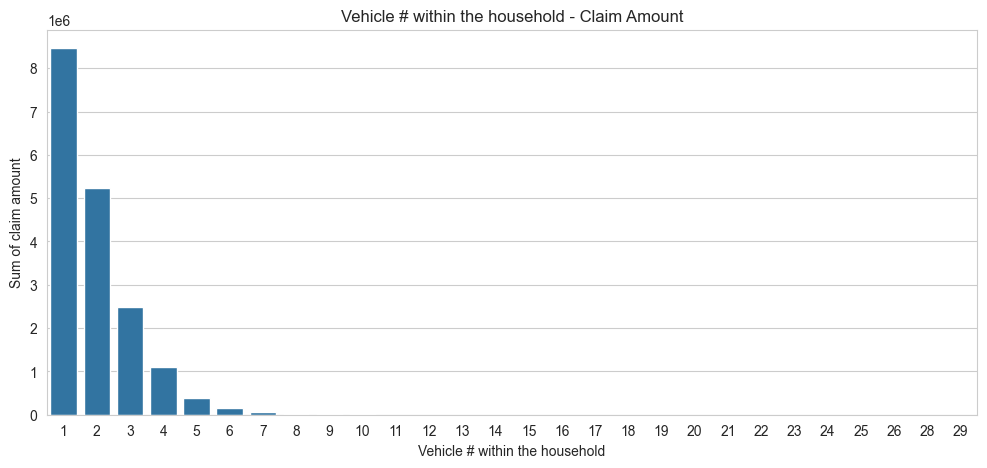

In [11]:
plt.figure(figsize=(12,5))
plt.title('Vehicle # within the household - Claim Amount')
plt.xlabel('Vehicle # within the household')
plt.ylabel('Sum of claim amount')
sns.barplot(x_train.groupby(by='Vehicle')['Claim_Amount'].agg('sum'))

Let's check the "Household_ID" and "Vehicle" to see if any relationships exist.

In [13]:
# Select and display the first 16 rows of the features 'Row_ID', 'Household_ID' and 'Vehicle' in x_train
x_train[['Row_ID', 'Household_ID', 'Vehicle']].head(16)

,Row_ID,Household_ID,Vehicle
0,1,1,3
1,2,2,2
2,3,3,1
3,4,3,1
4,5,3,2
5,6,3,2
6,7,4,1
7,8,4,2
8,9,4,3
9,10,5,1


In [14]:
# Filter rows in x_train where 'Household_ID' is equal to 5
x_train[x_train['Household_ID']==5]

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
9,10,5,1,2005,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
10,11,5,1,2006,1995,BW,BW.3,BW.3.0,D,?,...,0.176312,0.283264,0.969232,-0.792339,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
11,12,5,3,2005,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
12,13,5,3,2006,2003,BW,BW.167,BW.167.0,I,C,...,0.342832,1.451805,1.694201,1.242493,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0
13,14,5,4,2005,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,2.054683,-0.266117,-0.272337,-0.251419,0.0
14,15,5,4,2006,2004,Y,Y.9,Y.9.0,F,C,...,-0.608711,-1.134425,-1.193388,-0.732172,N,-0.231530,-0.266117,-0.272337,-0.251419,0.0


The "Household_ID" is the same for multiple vehicles. It appears that insured individuals have multiple vehicles with different makes and models. The "Cat" and "Var" features show some relationships, making them useful for featurization.

In [15]:
# Get the unique values in the 'Calendar_Year' column of x_train
x_train['Calendar_Year'].unique()

array([2005, 2006, 2007], dtype=int64)

Based on the above output, there is only 3 distinct values in the "Caldendar_Year" feature. It would explain the claim status in each years.

In [16]:
# Print the number of unique values in the 'Model_Year' column
print(x_train['Model_Year'].nunique())
# Sort and print the unique values in the 'Model_Year' column
np.sort(x_train['Model_Year'].unique())

29


array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009], dtype=int64)

The above output shows that there are 29 distinct years in the 'Model_Year' feature. It makes sense that the model year of vehicles ranges from 1981 to 2009.

In [17]:
# Print the number of unique values in the 'Blind_Make' column
print(x_train['Blind_Make'].nunique())
# Sort and print the unique values in the 'Blind_Make' column
np.sort(x_train['Blind_Make'].unique())

75


array(['?', 'A', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ',
       'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU',
       'AV', 'AW', 'AX', 'AY', 'AZ', 'B', 'BA', 'BB', 'BC', 'BD', 'BF',
       'BG', 'BH', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS',
       'BT', 'BU', 'BV', 'BW', 'BY', 'BZ', 'C', 'CA', 'CB', 'D', 'E', 'F',
       'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
       'U', 'V', 'W', 'X', 'Y', 'Z'], dtype=object)

Based on the above output for the feature "Blind_Make", there are 75 different makes of vehicles in the dataset.

In [18]:
# Print the number of unique values in the 'Blind_Model' column
print(x_train['Blind_Model'].nunique())
# Sort and print the unique values in the 'Blind_Model' column
np.sort(x_train['Blind_Model'].unique())

1303


array(['?', 'A.2', 'A.3', ..., 'Z.45', 'Z.5', 'Z.8'], dtype=object)

The above output shows that there are 1303 distinct values in the "Blind_Model" feature. It seems that this feature already contains vehicle make information, similar to what's in the "Blind_Make" feature. The redundancy in this feature should be taken into account during featurization.

In [19]:
# Print the number of unique values in the 'Blind_Submodel' column
print(x_train['Blind_Submodel'].nunique())
# Sort and print the unique values in the 'Blind_Submodel' column
np.sort(x_train['Blind_Submodel'].unique())

2740


array(['?', 'A.2.0', 'A.3.0', ..., 'Z.45.0', 'Z.5.0', 'Z.8.0'],
      dtype=object)

The 'Blind_Submodel' also exhibits the same redundancy as the 'Blind_Model' feature, duplicating information already present in the 'Blind_Make' and 'Blind_Model' features.

Let us check the unique values in the features "Cat1" and "NVCat" to see the distribution of values.

In [20]:
# Print the number of unique values in the 'Cat1' column of the training data
print(x_train['Cat1'].nunique())
# Sort and print the unique values in the 'Cat1' column of the training data
np.sort(x_train['Cat1'].unique())

11


array(['?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
      dtype=object)

In [ ]:
# Print the number of unique values in the 'NVCat' column of the training data
print(x_train['NVCat'].nunique())
# Print the unique values in the 'NVCat' column of the training data
x_train['NVCat'].unique()

15


array(['M', 'O', 'F', 'N', 'J', 'L', 'B', 'H', 'A', 'G', 'K', 'I', 'E',
       'C', 'D'], dtype=object)

The features 'Cat1' and 'NVCat' contain English alphabets. The features starting with the names 'Cat' and 'NVCat' are of a similar kind based on previous analysis and can be grouped together for featurization.

Let us check the unique values in the features "Var1" and "NVCat" to see the distribution of values.

In [22]:
# Print the number of unique values in the 'Var1' column of the training data
print(x_train['Var1'].nunique())
# Sort and print the first 10 unique values in the 'Var1' column of the training data
np.sort(x_train['Var1'].unique()[:10])

360


array([-0.7542818, -0.6337572, -0.3766379,  0.017076 ,  0.2179505,
        0.3224052,  0.4429298,  0.5634545,  0.7000491,  1.2705325])

In [24]:
# Print the number of unique values in the 'NVVar1' column of the training data
print(x_train['NVVar1'].nunique())
# Print the unique values in the 'NVVar1' column of the training data
x_train['NVVar1'].unique()

29


array([-0.2315299,  2.0546834,  1.4831301,  3.1977899,  2.5119259,
        1.1401981,  0.9115767,  4.3408966,  6.62711  ,  1.7280815,
        0.7482758,  0.6258001,  2.7078872,  3.8836539,  5.2553821,
        4.9124498,  0.4543341,  3.6876929,  1.2926123,  4.05512  ,
        2.3404601,  0.5305412,  0.6829554,  1.8260621,  1.6390083,
        0.3400235,  5.4840031,  1.0154955,  2.8167543])

The features 'Var1' and 'NVVar1' contain numerical values. The features starting with the names 'Var' and 'NVVar' are of a similar kind based on previous analysis and can be grouped together for mathematical featurization.

Group the "Claim_Amount" column of the training data by the values in the "Cat1" column, then calculate the mean of "Claim_Amount" for each group.

In [25]:
x_train.groupby(by='Cat1')['Claim_Amount'].mean()

Cat1
?    0.793362
A    1.196787
B    1.475656
C    1.289835
D    1.313834
E    1.149625
F    1.425081
G    1.264641
H    1.269609
I    1.336931
J    1.178263
Name: Claim_Amount, dtype: float64

In [15]:
x_train['Cat1'].value_counts()

Cat1
B    4017739
I    2654532
D    2487951
F    1305108
G     782602
A     768871
C     401355
E     279699
J     233968
H     226484
?      25981
Name: count, dtype: int64

The above output shows that the claim amount is distributed more or less equally for all the distinct values except for "?", which has a comparatively lower claim amount. Since there are very few "?" values in the "Cat1" feature, we could impute them with a new value that is not available in this feature. This approach can be applied to any features with a low number of "?" values.

Create a heatmap of the correlation matrix for numerical columns in the training data.

Text(0.5, 1.0, 'Correlation between numerical features')

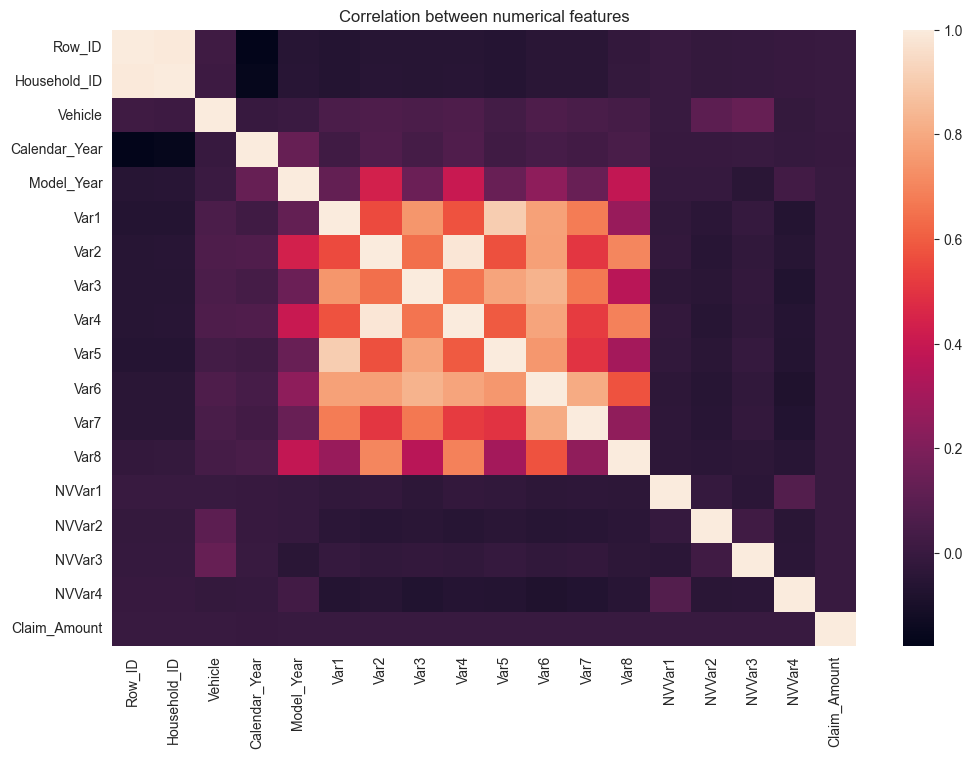

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train[x_train.dtypes[x_train.dtypes != 'object'].index].corr())
plt.title("Correlation between numerical features")

The correlation plot above indicates a strong correlation among the "Var" features. This finding suggests that focusing on additional featurization for "Var" features could be beneficial. However, none of the numerical features show a significant correlation with the target variable "Claim_Amount".

Calculate the correlation of numerical columns in the training data with "Claim_Amount".

In [29]:
x_train[x_train.dtypes[x_train.dtypes != 'object'].index].corrwith(x_train['Claim_Amount'])

Row_ID           0.000633
Household_ID     0.000582
Vehicle          0.000965
Calendar_Year   -0.003552
Model_Year       0.000172
Var1            -0.000859
Var2            -0.001338
Var3            -0.001142
Var4            -0.001201
Var5            -0.000186
Var6            -0.001316
Var7            -0.001424
Var8            -0.001558
NVVar1           0.000487
NVVar2           0.001443
NVVar3           0.001943
NVVar4           0.000140
Claim_Amount     1.000000
dtype: float64

The output above indicates that none of the numerical features have a significant correlation with the target variable 'Claim_Amount'. We should also consider the text features to see if any of them have a significant correlation with 'Claim_Amount'.

Check whether there are any features that have null values.

In [30]:
# Create a DataFrame containing the count of null values in each column of the training data
null_count = pd.DataFrame(x_train.isnull().sum(), columns=['Null_Count'])
# Filter the DataFrame to include only columns with more than 0 null values
null_count[null_count['Null_Count'] > 0]

,Null_Count
Cat12,28882


In [31]:
# Calculate and print the percentage of null values in the feature "Cat12"
print("{:.2f}%".format(round(null_count[null_count['Null_Count'] > 0].loc['Cat12'][0] / len(x_train) * 100, 2)))

0.22%


The output above shows that the feature "Cat12" has null values. The count of null values is significantly low, so we can impute them with a new value, as mentioned for "?" in other categorical features.

Review the target variable "Claim_Amount" to examine the distribution of values.

In [32]:
# Print the total number of data points in the training data
print('Total number of data points: ', len(x_train))
# Print the total number of data points with non-zero claim amounts
print("Total number of data points with Non-Zero Claim Amounts: ", len(x_train[x_train['Claim_Amount']>0]))
# Calculate and print the percentage of non-zero claim amounts
print("Percentage of Non-Zero Claim Amounts: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']>0])/len(x_train), 4) * 100))
# Calculate and print the percentage of data points with claim amounts equal to zero
print("Percentage of data with Claim_Amount equals zero: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']==0]) / len(x_train) * 100, 2)))
# Calculate and print the percentage of data points with claim amounts between greater than 0 and less than 100
print("Percentage of data for Claim_Amount between greater than 0 and less than 100: {:.2f}%".format(
      round((len(x_train[(x_train['Claim_Amount']>0) & (x_train['Claim_Amount']<100)]) / len(x_train)) * 100, 2)))
# Calculate and print the percentage of data points with claim amounts greater than or equal to 100
print("Percentage of data with Claim_Amount > 100: {:.2f}%".format(round(len(x_train[x_train['Claim_Amount']>=100]) / len(x_train), 4) * 100))

Total number of data points:  13184290
Total number of data points with Non-Zero Claim Amounts:  95605
Percentage of Non-Zero Claim Amounts: 0.73%
Percentage of data with Claim_Amount equals zero: 99.27%
Percentage of data for Claim_Amount between greater than 0 and less than 100: 0.47%
Percentage of data with Claim_Amount > 100: 0.26%


Based on the above output, 99.27% of the data has a Claim_Amount equal to zero, while only 0.47% falls between greater than 0 and less than 100. This indicates a significant imbalance in the target variable. Let's confirm this imbalance by plotting histograms.

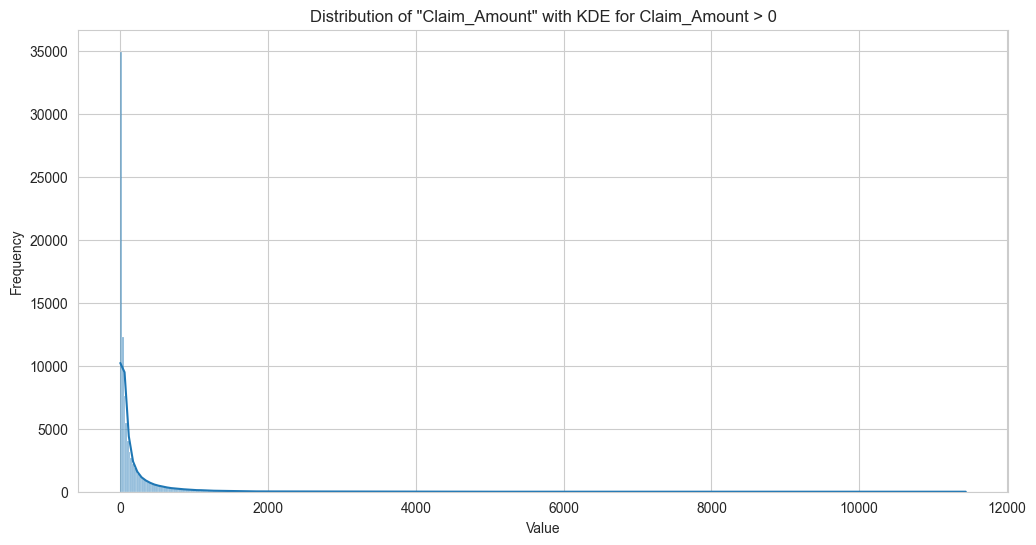

In [33]:
# Create a histogram plot with kernel density estimation (KDE) for 'Claim_Amount' values greater than 0
plt.figure(figsize=(12, 6))
sns.histplot(x_train[x_train['Claim_Amount']>0]['Claim_Amount'], bins=500, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 0')
plt.show()

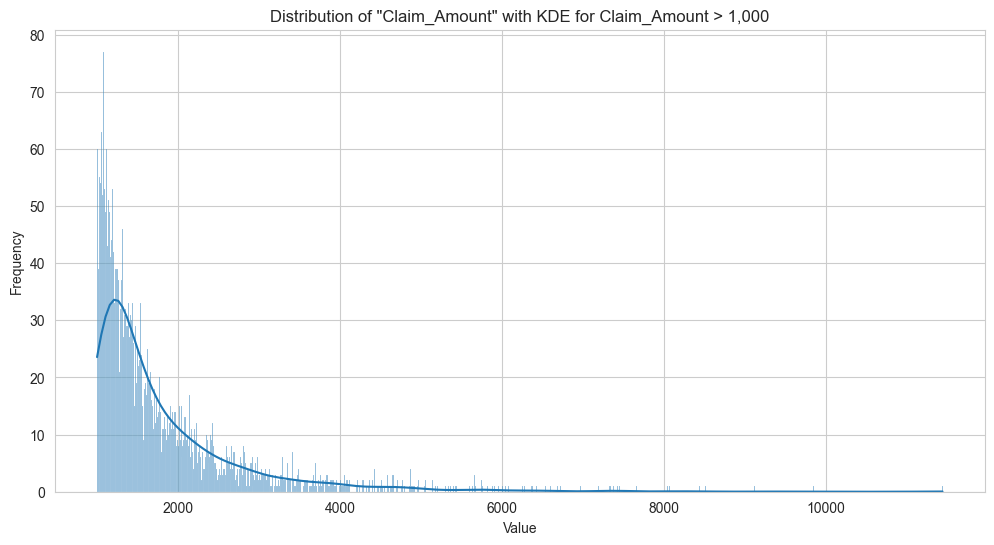

In [34]:
# Create a histogram plot with kernel density estimation (KDE) for 'Claim_Amount' values greater than 1000
plt.figure(figsize=(12, 6))
sns.histplot(x_train[x_train['Claim_Amount']>1000]['Claim_Amount'], bins=1000, kde=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of "Claim_Amount" with KDE for Claim_Amount > 1,000')
plt.show()

The histograms above show that there are outliers in the data with high Claim_Amount values. Removing these outliers would likely improve the model's performance.

Given the size of our dataset, which includes 17 million data points in both the training and test sets, training the model with all newly created data post-featurization might not be feasible. Therefore, we may need to consider eliminating the least significant features from the final dataset.

Read the list of important features generated by the XG Boost model (post featurization). There are a couple of lists of least important features created by the XGBoost model. One is based on 60% randomly sampled data, and the second one is derived from saved data that has already been sampled. The model was run 10 times for each set of data to determine the feature importance.

In [8]:
imp_feats_vs = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\imp_feats_volatile_sampling.csv')
imp_feats_fs = pd.read_csv(r'D:\ML_Projects\Vehicle_Insurance_Claims_Prediction\models\imp_feats_fixed_sampling.csv')

# Group by Feature and sum Importance, then sort
grouped_vs = imp_feats_vs.groupby('Feature')['Importance'].sum().nsmallest(50)
grouped_fs = imp_feats_fs.groupby('Feature')['Importance'].sum().nsmallest(50)
# Get common features
common_features = grouped_vs.index.intersection(grouped_fs.index)

# List the least important features
print(common_features)

52
Index(['Calendar_Year_Log', 'Calendar_Year_Nums_Exp', 'Calendar_Year_Nums_Log',
       'Model_Year_Log', 'Model_Year_Nums_Log', 'NVVar1_Exp', 'NVVar2_Exp',
       'NVVar2_Log', 'NVVar3_Exp', 'NVVar3_Log', 'NVVar4_Exp', 'NVVar4_Log',
       'Var1_Exp', 'Var2_Exp', 'Var3_Exp', 'Var3_Log', 'Var4_Exp', 'Var5_Exp',
       'Var6_Exp', 'Var6_Log', 'Var7_Exp', 'Var8_Log', 'NVVar2_Sqrt',
       'NVVar4_Sqrt', 'NVVar3_Sqrt', 'Var8_Exp', 'Var4_Log', 'Var1_Log',
       'Var7_Log', 'Var3_Sqrt', 'Var2_Log', 'NVVar1_Log', 'Var5_Log',
       'NVVar4_NVVar3_Sub', 'Var8_Inv', 'NVVar3_NVVar1_Div',
       'NVVar3_NVVar4_Mul', 'NVVar3_NVVar4_Div', 'NVVar4_NVVar1_Div',
       'NVVar2_NVVar3_Mul', 'NVVar1_NVVar3_Mul', 'Var5_Sqrt',
       'NVVar3_NVVar2_Div', 'Var6_Inv', 'Var4_Inv', 'NVVar2_NVVar4_Mul',
       'NVVar2_NVVar3_Div', 'Var1_Inv', 'NVVar1_NVVar4_Mul',
       'NVVar2_NVVar4_Div', 'Var7_Sqrt', 'NVVar3_Inv'],
      dtype='object', name='Feature')


The output above indicates that many newly created features are not useful for model performance. Therefore, we can remove these features during featurization.

Check the feature importance list to determine if the newly created features are having a significant impact on the model's performance.

In [15]:
# Group by Feature and sum Importance, then sort
grouped_vs = imp_feats_vs.groupby('Feature')['Importance'].sum().nlargest(100)
grouped_fs = imp_feats_fs.groupby('Feature')['Importance'].sum().nlargest(100)

# Get common features
common_features = grouped_vs.index.intersection(grouped_fs.index)

# List the top importance features
print(common_features)

93
Index(['NVVar4_NVVar2_Sub', 'Calendar_Year_Nums', 'Calendar_Year',
       'Model_Year_Nums_Exp', 'Model_Year', 'Cat5', 'Cat6', 'Cat12',
       'NVVar3_NVVar1_Sub', 'Calendar_Year_Model_Year_Add', 'Cat11', 'Cat10',
       'Model_Year_Nums', 'Var2', 'NVVar4_NVVar1_Sub', 'Cat8',
       'Calendar_Year_Model_Year_Mul', 'Vehicle_Log', 'Cat4', 'Cat_9-12_w2v_1',
       'Cat_9-12_w2v_4', 'Calendar_Year_Model_Year_Div', 'Cat_9-12_w2v_2',
       'Household_ID', 'OrdCat', 'Cat_9-12', 'Vehicle',
       'Calendar_Year_Model_Year_Sub', 'Cat_9-12_w2v_5', 'NVVar1_Sqrt',
       'NVVar3', 'Cat9', 'NVVar1', 'Var6', 'NVVar2', 'Blind_Model', 'Var5',
       'Var4', 'Var1', 'Blind_Make', 'Var8', 'Vehicle_Exp', 'Cat_1-4_w2v_5',
       'Blind_Submodel', 'NVVar4', 'Cat_9-12_w2v_3', 'Cat_5-8_w2v_2',
       'Blind_Submodel_Num', 'NVVar2_NVVar1_Sub', 'Var7', 'Cat2',
       'Blind_Model_Char', 'NVVar3_NVVar2_Sub', 'Cat_1-4_w2v_1',
       'NVVar1_NVVar3_Sub', 'Cat_1-4_w2v_3', 'Var3_Inv', 'NVCat',
       'NVVar1_NV

The output above indicates that the newly created features are beneficial for the model.